In [1]:
import pandas as pd

In [2]:
from datasets import load_from_disk
from collections import Counter
import matplotlib.pyplot as plt

### Loading Dataset: Train, Val, Test ###

In [3]:
dataset = load_from_disk("../data/train_dataset/")
### Includes Train & Validation data ###

test_dataset = load_from_disk("../data/test_dataset/")

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
        num_rows: 3952
    })
    validation: Dataset({
        features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
        num_rows: 240
    })
})

In [13]:
dataset["train"].features == dataset_combined.features

True

In [10]:
from datasets import concatenate_datasets
dataset_combined = concatenate_datasets([dataset["train"], dataset["validation"]])

dataset_combined

Dataset({
    features: ['title', 'context', 'question', 'id', 'answers', 'document_id', '__index_level_0__'],
    num_rows: 4192
})

#### Converting to Pandas Dataframe for convenient analysis

In [7]:
### Converting to Pandas dataframe for convenient analysis ###
train_df = pd.DataFrame.from_records(dataset['train'])
val_df = pd.DataFrame.from_records(dataset['validation'])
test_df = pd.DataFrame.from_records(test_dataset['validation'])

In [8]:
### Train DF ###
train_df.head()

,title,context,question,id,answers,document_id,__index_level_0__
0,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}",18293,42
1,인사조직관리,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...,현대적 인사조직관리의 시발점이 된 책은?,mrc-0-004397,"{'answer_start': [212], 'text': ['《경영의 실제》']}",51638,2873
2,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,mrc-1-000362,"{'answer_start': [510], 'text': ['백성']}",5028,230
3,금동삼존불감,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든...",11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,mrc-0-001510,"{'answer_start': [625], 'text': ['중국']}",34146,992
4,계사명 사리구,동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...,명문이 적힌 유물을 구성하는 그릇의 총 개수는?,mrc-0-000823,"{'answer_start': [30], 'text': ['4개']}",47334,548


In [9]:
### VAL DF ###
val_df.head()

,title,context,question,id,answers,document_id,__index_level_0__
0,전효숙,"순천여자고등학교 졸업, 1973년 이화여자대학교를 졸업하고 1975년 제17회 사법...",처음으로 부실 경영인에 대한 보상 선고를 받은 회사는?,mrc-0-003264,"{'answer_start': [284], 'text': ['한보철강']}",9027,2146
1,스토우빌선,요크 카운티 동쪽에 처음으로 여객 열차 운행이 시작한 시점은 1868년 토론토 & ...,스카버러 남쪽과 코보콘그 마을의 철도 노선이 처음 연장된 연도는?,mrc-0-004762,"{'answer_start': [146], 'text': ['1871년']}",51765,3106
2,촐라,"촐라 정부\n 촐라의 정부 체제는 전제군주제였으며,2001 촐라의 군주는 절대적인 ...",촌락에서 운영 위원 후보자 이름을 쓰기위해 사용된 것은?,mrc-1-001810,"{'answer_start': [517], 'text': ['나뭇잎']}",15694,1180
3,백조 기사,프랑스의 십자군 무훈시는 1099년 예루살렘 왕국의 통치자가 된 고드프루아 드 부용...,로타이르가 백조를 구하기 위해 사용한 것은?,mrc-1-000219,"{'answer_start': [1109], 'text': ['금대야']}",59536,141
4,탈관료제화,탈관료제화는 현대사회에서 관료제 성격이 약화되는 현상이다. 현대사회에서 관료제는 약...,의견을 자유롭게 나누는 것은 조직 내 어떤 관계에서 가능한가?,mrc-1-000285,"{'answer_start': [386], 'text': ['수평적 관계']}",32991,184


In [10]:
### TEST DF ###
test_df.head()

,question,id
0,유령'은 어느 행성에서 지구로 왔는가?,mrc-1-000653
1,용병회사의 경기가 좋아진 것은 무엇이 끝난 이후부터인가?,mrc-1-001113
2,돌푸스에게 불특정 기간동안 하원이 잠시 쉬는 것을 건의 받았던 인물은?,mrc-0-002191
3,"마오리언어와 영어, 뉴질랜드 수화를 공식 언어로 사용하는 나라는?",mrc-0-003951
4,디엔비엔푸 전투에서 보응우옌잡이 상대한 국가는?,mrc-1-001272


In [11]:
print(f"Train Data Size: {len(train_df)}")
print(f"Validation Data Size: {len(val_df)}")
print(f"Test Data Size: {len(test_df)}")

Train Data Size: 3952
Validation Data Size: 240
Test Data Size: 600


In [12]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("klue/roberta-large")

In [21]:
train_context = train_df['context'].tolist()
val_context = val_df['context'].tolist()

In [13]:
tokenizer.vocab_size

32000

In [22]:
res = []

for i in range(len(train_context)):
    res.append(tokenizer(
        train_context[i],
        return_tensors="pt",
        add_special_tokens = True
    ))

encoded_train_contexts = []

for i in range(len(res)):
    s = [tokenizer.convert_ids_to_tokens(s) for s in res[i]['input_ids']]
    encoded_train_contexts.append(s[0])

In [23]:
val_res = []

for i in range(len(val_context)):
    val_res.append(tokenizer(
        val_context[i],
        return_tensors="pt",
        add_special_tokens = True
    ))

encoded_val_contexts = []

for i in range(len(val_res)):
    s = [tokenizer.convert_ids_to_tokens(s) for s in val_res[i]['input_ids']]
    encoded_val_contexts.append(s[0])

In [44]:
import numpy as np
encoded_train_contexts_len = []

for encoded_sentence in encoded_train_contexts:
    encoded_train_contexts_len.append(len(encoded_sentence))
encoded_train_contexts_len = np.array(encoded_train_contexts_len)

print("train token length")
print("count : ", len(encoded_train_contexts_len))
print("mean of len : ", np.mean(encoded_train_contexts_len))
print("median of len: ", np.median(encoded_train_contexts_len))
print("std of len : ", np.std(encoded_train_contexts_len))
print("max of len : ", np.max(encoded_train_contexts_len))
print("min of len : ", np.min(encoded_train_contexts_len))
print('1Q Length : {}'.format(np.percentile(encoded_train_contexts_len, 25)))
print('2Q Length : {}'.format(np.percentile(encoded_train_contexts_len, 50)))
print('3Q Length : {}'.format(np.percentile(encoded_train_contexts_len, 75)))

max_sequence_length = 512
print(f"number of items that are bigger than {max_sequence_length}:" , len(encoded_train_contexts_len[encoded_train_contexts_len > max_sequence_length]), "out of", len(encoded_train_contexts_len))

train token length
count :  3952
mean of len :  497.30161943319837
median of len:  444.0
std of len :  193.77720291573794
max of len :  1174
min of len :  241
1Q Length : 348.0
2Q Length : 444.0
3Q Length : 594.0
number of items that are bigger than 512: 1417 out of 3952


In [ ]:
# take a look at elements that are longer than max_sequence_length
for i in range(len(encoded_train_contexts_len)):
    if encoded_train_contexts_len[i] > max_sequence_length:
        # get index number of the item
        print(res[i])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f61104a6ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f61104b1220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f61104a6700>],
 'medians': [<matplotlib.lines.Line2D at 0x7f61104b1940>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f61104bf0a0>],
 'means': [<matplotlib.lines.Line2D at 0x7f61104b1cd0>]}

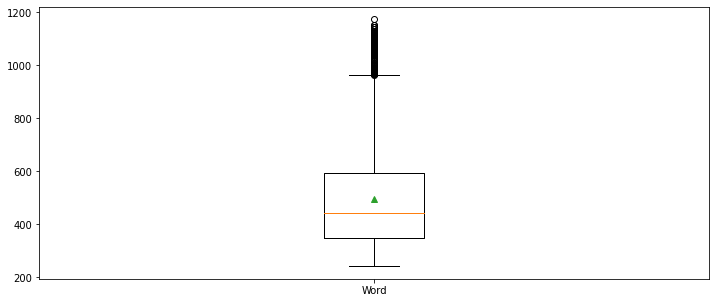

In [41]:
# ignore matplotlib warning
plt.figure(figsize=(12,5))
plt.boxplot([encoded_train_contexts_len],
            labels = ['Word'],
            showmeans=True)

In [45]:
import numpy as np
encoded_val_contexts_len = []

for encoded_sentence in encoded_val_contexts:
    encoded_val_contexts_len.append(len(encoded_sentence))
encoded_val_contexts_len = np.array(encoded_val_contexts_len)

print("valid token length")
print("count : ", len(encoded_val_contexts_len))
print("mean of len : ", np.mean(encoded_val_contexts_len))
print("median of len: ", np.median(encoded_val_contexts_len))
print("std of len : ", np.std(encoded_val_contexts_len))
print("max of len : ", np.max(encoded_val_contexts_len))
print("min of len : ", np.min(encoded_val_contexts_len))
print('1Q Length : {}'.format(np.percentile(encoded_val_contexts_len, 25)))
print('2Q Length : {}'.format(np.percentile(encoded_val_contexts_len, 50)))
print('3Q Length : {}'.format(np.percentile(encoded_val_contexts_len, 75)))

max_sequence_length = 512
print(f"number of items that are bigger than {max_sequence_length}:" , len(encoded_val_contexts_len[encoded_val_contexts_len > max_sequence_length]), "out of", len(encoded_val_contexts_len))

valid token length
count :  240
mean of len :  496.3041666666667
median of len:  435.5
std of len :  197.22014767590443
max of len :  1153
min of len :  267
1Q Length : 341.25
2Q Length : 435.5
3Q Length : 599.25
number of items that are bigger than 512: 91 out of 240


{'whiskers': [<matplotlib.lines.Line2D at 0x7f611040dc40>,
 'caps': [<matplotlib.lines.Line2D at 0x7f611041b3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f611047e8b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f611041bac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6110427220>],
 'means': [<matplotlib.lines.Line2D at 0x7f611041be50>]}

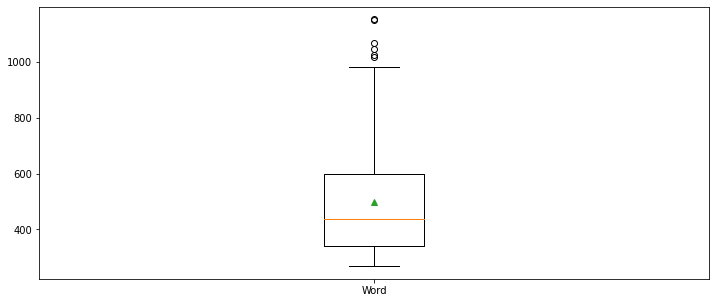

In [46]:
# ignore matplotlib warning
plt.figure(figsize=(12,5))
plt.boxplot([encoded_val_contexts_len],
            labels = ['Word'],
            showmeans=True)

#### Analysis for 'answers' column

In [11]:
### Answer word count ###

In [12]:
### Extracting only the 'text' parts from answers column ###
answer_texts = [train_df.iloc[i]['answers']['text'] for i in range(len(train_df))]

In [13]:
answer_texts[:10]

[['하원'],
 ['《경영의 실제》'],
 ['백성'],
 ['중국'],
 ['4개'],
 ['드래곤'],
 ['형양태수 왕식'],
 ['이탈리아군'],
 ['큰아들 유'],
 ['왕대마을']]

In [14]:
### Checking the length of answer texts splitted with space ' ' ###
answer_text_lengths = [len(i[0].split()) for i in answer_texts]

In [15]:
answer_text_lengths[:20]

[1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 2]

In [16]:
number_of_answers = [len(i) for i in answer_texts]

In [17]:
Counter(number_of_answers)

Counter({1: 3952})

In [18]:
word_counts = Counter(answer_text_lengths)

In [19]:
word_counts

Counter({1: 2288,
         2: 1065,
         3: 349,
         5: 52,
         8: 7,
         6: 39,
         4: 120,
         7: 18,
         15: 1,
         9: 4,
         13: 1,
         20: 1,
         10: 3,
         14: 2,
         18: 1,
         16: 1})

In [20]:
counts = sorted([key for key,value in word_counts.items()])
freq = [word_counts[count] for count in counts]

In [21]:
counts

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 18, 20]

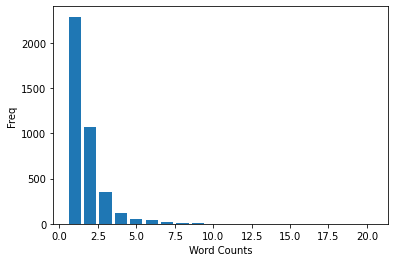

In [22]:
plt.bar(counts, freq, align = 'center')
plt.xlabel('Word Counts')
plt.ylabel('Freq')
plt.show()